# RKKY Exchange Interactions in 2-D Mn-doped ZnO

Coupling constant (J) vs Distance between dopants (r) for 5% Mn doping

In [15]:
import numpy as np
from numpy import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pandas
import math
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 

In [16]:
# Initializing a NxN ZnO host lattice 

N = 100 
n = int(N/2)

def lattice(N):
    return arr
arr = np.zeros((N, N)) 
Zn_row = np.ones((n, N)) 
arr[::2] = Zn_row

# lattice constants

a, c = 3.27, 2.63  # c is halved for calculations

# random replcement of elements in matrix(doping)

Mn_percent = 5     # doping percentage

no_of_Mn = int(((len(Zn_row)*N)*Mn_percent)/100) 
Mn_arr = np.zeros((no_of_Mn, 2))

count = 0 
while count < no_of_Mn:
    i = np.random.randint(len(arr))
    j = np.random.randint(len(arr))
    if arr[i][j] == 0:
        arr[i][j] = 2
        Mn_arr[count][0] = i
        Mn_arr[count][1] = j        
    else:
        continue
    count += 1

print(arr.astype(int))
#print('\n', "Locations of all Mn in lattice:")
#print('\n', Mn_arr.astype(int))


nb_list = []

for i in Mn_arr.astype(int):
    x0, y0, k1 = i[0], i[1], 10
    nb_list.append(sorted(Mn_arr.astype(int), key = lambda k1: c*(k1[0]-x0)**2 + a*(k1[1]-y0)**2)[1 : k1+1])
    #print([x0, y0])   # ALL Mn LOCATIONS
    
nb0 = np.array(nb_list) 
nb = nb0.reshape((2500, 2))  # ALL NEAREST NEIGHBOURS CORRESPONDING TO EACH Mn
print('\n'*3, nb)

[[1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]]



 [[37 62]
 [41 60]
 [41 66]
 ...
 [99 95]
 [83 95]
 [81 93]]


In [17]:
d_list = []

for i in range(len(Mn_arr)):
    for j in range(249*i, 249*i+249):        
        d_list.append(sqrt((c*(Mn_arr[i][0] - nb[j][0]))**2 + (a*(Mn_arr[i][1] - nb[j][1]))**2))  # ALL DISTANCES CALCULATION 
print(len(d_list))        
d_arr0 = np.array(d_list)
d_arr = d_arr0.reshape((62250, 1))          # ALL DISTANCES OF ALL NNs
print('\n', "Distances of each Mn (row-wise):")
print('\n', d_arr.reshape((250, 249)))
d_arr_unique = np.unique(d_arr, axis = 0)   # ONLY UNIQUE VALUES OF DISTANCES
print('\n', "Unique distances =", len(d_arr_unique))
print('\n', d_arr_unique)

"""n_step = 10
d_avg_arr = np.average(d_arr.reshape(-1, n_step), axis = 1)   # AVERAGE DISTANCES OF EACH SPIN'S NEIGHBOURS
#print('\n',d_avg_arr.reshape((25, 10))
        
for i in range(len(Mn_arr)):
    d_arr1 = d_arr[10*i : 10*i+9].sort()   # WONT WORK !!!
print('\n',d_arr1)""" 


j_list, l_list = [], []

for i in range(len(Mn_arr)):
    l_list.append(d_arr[249*i+2])
l_arr = np.array(l_list)

l_avg = np.sum(l_arr)/len(Mn_arr)     # AVERAGE DAMPING SCALE
print('\n'*2, "Average damping scale value = ", l_avg)

for i in range(d_arr.shape[0]):
    j_list.append((0.0174*(np.exp(-d_arr[i][0]/l_avg)*(np.sin(1.585*d_arr[i][0])-1.585*d_arr[i][0]*np.cos(1.585*d_arr[i][0]))/(d_arr[i][0]**4)))*13600)

j_arr = np.array(j_list)
j_arr = j_arr.reshape((62250, 1))      # ALL EXCHANGE CONSTANTS CORRESPONDING TO EACH NN
print('\n'*2, "Exchange constants corresponding to ALL remaining Mn:")
print('\n', j_arr.reshape((250, 249)))


j_unique = []    # ONLY UNIQUE VALUES OF J CORRESPONDING TO UNQUE DISTANCE 

for i in range(d_arr_unique.shape[0]):
    j_unique.append((0.0174*(np.exp(-d_arr_unique[i][0]/l_avg)*(np.sin(1.585*d_arr_unique[i][0])-1.585*d_arr_unique[i][0]*np.cos(1.585*d_arr_unique[i][0]))/(d_arr_unique[i][0]**4)))*13600)

"""j_avg_arr = np.average(j_arr.reshape(-1, n_step), axis = 1)
print('\n'*2, "Average exchange constants for nearest neighbours sets:",'\n')
#print(j_avg_arr.reshape((25, 10)))"""

IndexError: index 2500 is out of bounds for axis 0 with size 2500

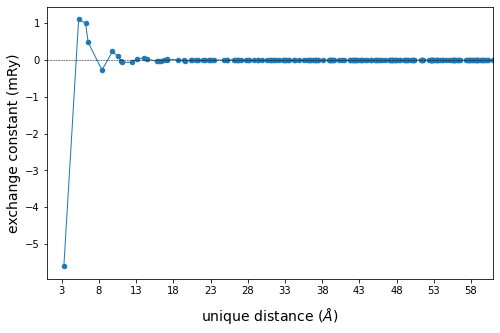

In [3]:
# PLOT OF UNIQUE J AND R

d_lst_5percent = d_arr_unique.tolist()
j_lst_5percent = j_unique

plt.figure(figsize = (8, 5))
plt.plot(d_lst_5percent, j_lst_5percent, lw = 1, marker = 'o', markersize = 4.5)
plt.xlabel(r'unique distance ($\AA$)', fontsize = 14, labelpad = 10)
plt.ylabel(r'exchange constant (mRy)', fontsize = 14)
plt.xticks(np.arange(int(min(d_arr_unique)), int(max(d_arr_unique))+5, 5))
plt.xlim(1, 61)
plt.axhline(y=0, color='black', linestyle='--',linewidth = 0.5)
print('\n')
plt.show()

In [4]:
# RANDOM SPIN SELECTION 

rand_index = np.random.choice(Mn_arr.shape[0], size = 1)
rand_Mn = Mn_arr[rand_index, :]
print('\n', "Random Mn spin:", rand_Mn[0].astype(int))

x, y, K = int(rand_Mn[0][0]), int(rand_Mn[0][1]), 10
NN_list = sorted(Mn_arr, key = lambda K: c*(K[0]-x)**2 + a*(K[1]-y)**2)[1 : K+1]
NN0 = np.array(NN_list)
NN = NN0.astype(int)
print('\n'*2, "Nearest ten neighbours:")
print('\n', NN)

r = np.zeros((10, 1))
for i in range(NN.shape[0]):
    r[i] = sqrt((c*(x - NN[i][0]))**2 + (a*(y - NN[i][1]))**2)

r1 = np.sort(r, axis = 0)
print('\n'*2, "Distances:")
print('\n', r1)    


 Random Mn spin: [49 81]


 Nearest ten neighbours:

 [[45 81]
 [45 79]
 [55 79]
 [45 86]
 [45 87]
 [57 82]
 [43 76]
 [41 84]
 [49 90]
 [45 90]]


 Distances:

 [[10.52      ]
 [12.38717078]
 [17.08156901]
 [19.4420395 ]
 [21.29259261]
 [22.26240778]
 [22.72291575]
 [23.21460101]
 [29.43      ]
 [31.25372458]]



 2K = 1.5853309190424043


<ipython-input-32-558646b5365b>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


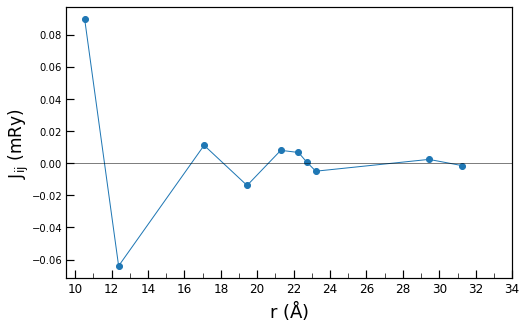

In [32]:
# CALCULATION AND PLOT

nc = 0.1                   # hole number density 
K = (2*np.pi*nc)**(1/2)    # fermi wave number 
print('\n', "2K =", 2*K)
l = r1[2][0]               # damping scale (cutoff factor)

def calc_x(K, r1):         # x = 2*K*r
    return [2*K*i for i in r1]
x1= calc_x(K, r1)

def coupling_constant_5percent(r1, l, K, x1):
    return (0.0174*(np.exp(-r1/l)*(np.sin(x1)-x1*np.cos(x1))/(r1**4)))*13600
coupling_constant1 = np.vectorize(coupling_constant_5percent)

J1 = coupling_constant1(r1, l, K, x1) 

#mpl.rcParams['axes.linewidth'] = 1.4
mpl.rcParams['mathtext.default'] = 'regular'

plt.figure(figsize = (8, 5))
plt.plot(r1, J1, '-', lw =1, marker = 'o', markersize = 6)
plt.xticks(np.arange(int(min(r1)), int(max(r1))+4, 2), fontsize = 12)
ax = plt.axes()
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis ="both", which ="major", direction ='in', length = 8, width = 1.2)
ax.tick_params(axis = "both", which ="minor", direction ='in', length = 5, width = 0.7)
plt.axhline(y=0, color='black', linestyle='-',linewidth = 0.5)
plt.xlabel(r'$r\ (\AA)$', fontsize = 18, labelpad = 2)
plt.ylabel(r'$J_{ij}\ (mRy)$', fontsize = 17, labelpad = 0.1)
plt.show()

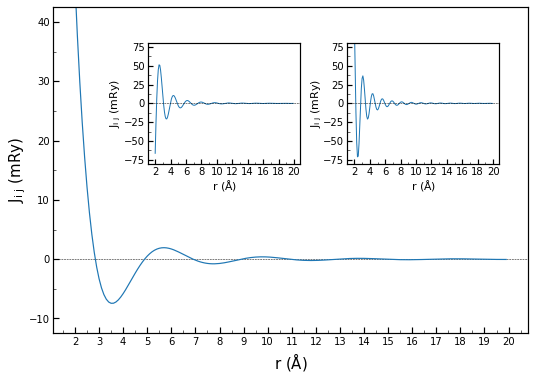

In [31]:
# THEORETICAL PLOTS

print('\n')

def jvsrA(r_tc):
    return (0.0174*(np.sin(1.58*r_tc)-1.58*r_tc*np.cos(1.58*r_tc))/(r_tc**4))*13600   # 5% doping
jvsr1 = np.vectorize(jvsrA)

def jvsrB(r_tc):
    return (0.0184*(np.sin(3.54*r_tc)-3.54*r_tc*np.cos(3.54*r_tc))/(r_tc**4))*13600   # 10% doping
jvsr2 = np.vectorize(jvsrB)

def jvsrC(r_tc):
    return (0.016*(np.sin(5.01*r_tc)-5.01*r_tc*np.cos(5.01*r_tc))/(r_tc**4))*13600    # 20% doping
jvsr3 = np.vectorize(jvsrC)

r_tc = np.arange(2, 20, 0.1)   # distance range

J1_tc = jvsrA(r_tc)
J2_tc = jvsrB(r_tc)
J3_tc = jvsrC(r_tc)

fig, ax = plt.subplots(figsize = (8.5, 6))
#mpl.rcParams['axes.linewidth'] = 1.2

ax.set_xticks(np.arange(2, int(max(r_tc))+3, 1))
ax.set_yticks(np.arange(-10, 50, 10))
ax.axhline(y=0, color='black', linestyle ='--', linewidth = 0.5)
ax.plot(r_tc, J1_tc, lw = 1.2)
ax.set_ylim(-12.5, 42.5)
ax.set_xlabel(r'$r\ (\AA)$', fontsize = 15, labelpad = 4)
ax.set_ylabel(r'$J_{i\ j}\ (mRy)$', fontsize = 15, labelpad = 1)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(ticker.FixedLocator([-5, 5, 15, 25, 35]))
ax.tick_params(axis ="both", which ="major", direction ='in', length = 6, width = 1.2)
ax.tick_params(axis = "x", which ="minor", direction ='in', length = 3, width = 0.6)
ax.tick_params(axis = "y", which ="minor", direction ='in', length = 2.5, width = 0.6)

axIns1 = ax.inset_axes([0.20, 0.52, 0.32, 0.37])
axIns1.plot(r_tc, J2_tc, lw = 1)
axIns1.set_xticks(np.arange(2, int(max(r_tc))+3, 2))
axIns1.set_ylim(-80, 80)
axIns1.set_yticks(np.arange(-75, 100, 25))
axIns1.set_xlabel(r'$r\ (\AA)$', fontsize = 11, labelpad = 1)
axIns1.set_ylabel(r'$J_{i\ j}\ (mRy)$', fontsize = 11, labelpad = 0.5)
axIns1.xaxis.set_minor_locator(MultipleLocator(1))
axIns1.yaxis.set_minor_locator(ticker.FixedLocator([-62.5, -37.5, -12.5, 12.5, 37.5, 62.5]))
axIns1.tick_params(axis ="both", which ="major", direction ='in', length = 5, width = 1.2)
axIns1.tick_params(axis = "both", which ="minor", direction ='in', length = 2.5, width = 0.6)
axIns1.axhline(y=0, color='black', linestyle='--',linewidth = 0.5)

axIns2 = ax.inset_axes([0.62, 0.52, 0.32, 0.37])
axIns2.plot(r_tc, J3_tc, lw = 1)
axIns2.set_xticks(np.arange(2, int(max(r_tc))+3, 2))
axIns2.set_ylim(-80, 80)
axIns2.set_yticks(np.arange(-75, 100, 25))
axIns2.set_xlabel(r'$r\ (\AA)$', fontsize = 11, labelpad = 1)
axIns2.set_ylabel(r'$J_{i\ j}\ (mRy)$', fontsize = 11, labelpad = -1)
axIns2.xaxis.set_minor_locator(MultipleLocator(1))
axIns2.yaxis.set_minor_locator(ticker.FixedLocator([-62.5, -37.5, -12.5, 12.5, 37.5, 62.5]))
axIns2.tick_params(axis ="both", which ="major", direction ='in', length = 5, width = 1.2)
axIns2.tick_params(axis = "both", which ="minor", direction ='in', length = 2.5, width = 0.6)
axIns2.axhline(y=0, color='black', linestyle='--',linewidth = 0.5)
#plt.savefig("plot1.png", format="png", dpi=1200)

plt.show()

In [7]:
r_1, r_2, r_3 = 3.27, 3.27, 3.27

ans1 = (0.0174*(np.sin(1.58*r_1)-1.58*r_1*np.cos(1.58*r_1))/(r_1**4))*13600  # 5 % config.
ans2 = (0.0184*(np.sin(3.54*r_2)-3.54*r_2*np.cos(3.54*r_2))/(r_2**4))*13600  # 10 % config.
ans3 = (0.0160*(np.sin(5.01*r_3)-5.01*r_3*np.cos(5.01*r_3))/(r_3**4))*13600  # 20 % config.

print(ans1, ans2, ans3)

-6.551420932175556 -15.719244419877496 23.1574279347052


# J vs r (10% Mn)

In [8]:
array = arr.copy()
array.astype(int)

dope_over = 5  
total_dope = Mn_percent + dope_over

Mn_arrx = Mn_arr.copy()
no_of_Mn_over = int(((len(Zn_row)*N)*dope_over)/100) 
tot = int(no_of_Mn + no_of_Mn_over)
Mn_array = np.zeros((no_of_Mn_over, 2))

count = 0 
while count < no_of_Mn_over:
    i = np.random.randint(len(array))
    j = np.random.randint(len(array))
    if array[i][j] == 0:
        array[i][j] = 2
        Mn_array[count][0] = i
        Mn_array[count][1] = j        
    else:
        continue
    count += 1

print(array.astype(int))
print("")
Mn_arrx.astype(int)
Mn_array.astype(int)
new_Mn_arr = np.concatenate((Mn_arrx, Mn_array))
np.random.shuffle(new_Mn_arr)
#print(new_Mn_arr.astype(int))

[[1 1 1 ... 1 1 1]
 [0 2 0 ... 2 0 0]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 2 0 0]
 [1 1 1 ... 1 1 1]
 [0 2 0 ... 0 0 0]]



In [9]:
# RANDOM SPIN (PREVIOUS) AND NEW NEIGHBOURS 

rand_index = np.random.choice(new_Mn_arr.shape[0], size = 1)

x, y, K = int(rand_Mn[0][0]), int(rand_Mn[0][1]), 10
print('\n', "Random spin as before: ", [x, y])
NN_list = sorted(new_Mn_arr, key = lambda K: c*(K[0]-x)**2 + a*(K[1]-y)**2)[1 : K+1]
NN0 = np.array(NN_list)
NN = NN0.astype(int)
print('\n'*2, "Nearest ten neighbours:")
print('\n', NN)

r = np.zeros((10, 1))
for i in range(NN.shape[0]):
    r[i] = sqrt((c*(x - NN[i][0]))**2 + (a*(y - NN[i][1]))**2)

r2 = np.sort(r, axis = 0)
print('\n'*2, "Distances:")
print('\n', r2) 


 Random spin as before:  [49, 81]


 Nearest ten neighbours:

 [[45 81]
 [45 79]
 [55 82]
 [55 79]
 [45 86]
 [45 87]
 [47 74]
 [57 82]
 [43 76]
 [41 84]]


 Distances:

 [[10.52      ]
 [12.38717078]
 [16.11525054]
 [17.08156901]
 [19.4420395 ]
 [21.29259261]
 [22.26240778]
 [22.72291575]
 [23.21460101]
 [23.48658553]]



 2K = 3.5449077018110318


<ipython-input-10-09818d2cc247>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


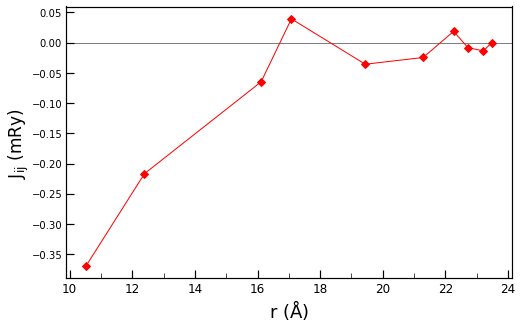

In [10]:
nc2 = 0.5                    
K2 = (2*np.pi*nc2)**(1/2)         
print('\n', "2K =", 2*K2)
l2 = r2[2][0]

def calc_x2(K2, r2):              
    return [2*K2*i for i in r2]
x2= calc_x2(K2, r2)
                                            
def coupling_new_10percent(r2, l2, K2, x2):
    return ((0.01845)*(np.exp(-r2/l2)*(np.sin(x2)-x2*np.cos(x2))/(r2**4)))*13600
coupling_constant2 = np.vectorize(coupling_new_10percent)

J2 = coupling_constant2(r2, l2, K2, x2)

plt.figure(figsize = (8, 5))
plt.xticks(np.arange(int(min(r2)), int(max(r2))+4, 2), fontsize = 12)
#plt.yticks(np.arange(-0.07, 0.02, 0.01), fontsize = 12)
#plt.ylim(-0.07, 0.05)
ax = plt.axes()
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis ="both", which ="major", direction ='in', length = 8, width = 1.2)
ax.tick_params(axis = "both", which ="minor", direction ='in', length = 5, width = 0.7)
plt.xlabel("distance (r)", fontsize = 19, labelpad = 12)
plt.ylabel("J (mRy)", fontsize = 19, labelpad = 10)
plt.axhline(y=0, color='black', linestyle='-',linewidth = 0.5)
plt.plot(r2, J2, '-', lw = 1, color = "red", label = 'x = 0.10', marker = 'D', markersize = 5)
plt.xlabel(r'$r\ (\AA)$', fontsize = 18, labelpad = 2)
plt.ylabel(r'$J_{ij}\ (mRy)$', fontsize = 17, labelpad = 0.1)
plt.show()

In [11]:
nb_list2 = []

for i in new_Mn_arr.astype(int):
    x02, y02, k2 = i[0], i[1], 499
    nb_list2.append(sorted(new_Mn_arr.astype(int), key = lambda k2: c*(k2[0]-x02)**2 + a*(k2[1]-y02)**2)[1 : k2+1]) 
    #print(x02, y02)   # ALL Mn LOCATIONS
    
nb02 = np.array(nb_list2) 
nb2 = nb02.reshape((249500, 2))  # ALL NNs CORRESPONDING TO EACH Mn
#print(nb2)

In [12]:
d_list2 = []

for i in range(len(new_Mn_arr)):
    for j in range(499*i, 499*i+499):        
        d_list2.append(sqrt((c*(new_Mn_arr[i][0] - nb2[j][0]))**2 + (a*(new_Mn_arr[i][1] - nb2[j][1]))**2))  # ALL DISTANCES

d_arr02 = np.array(d_list2)
d_arr2 = d_arr02.reshape((249500, 1))            # ALL DISTANCES OF ALL NNs
print('\n', "Ten nearest neighbour distances of each Mn (row-wise):")
print('\n', d_arr2.reshape((500, 499)))
d_arr_unique2 = np.unique(d_arr2, axis = 0)      # ONLY UNIQUE VALUES OF DISTANCES
print('\n'*2,"Unique distances =", len(d_arr_unique2))
print('\n', d_arr_unique2)

"""d_avg_arr2 = np.average(d_arr2.reshape(-1, n_step), axis = 1)    # AVERAGE DISTANCES OF EACH SPIN'S NN
#print('\n',"Average distances in sets of ten:",'\n',d_avg_arr2.reshape((24950, 1)))  

for i in range(len(new_Mn_arr)):
    d_arr12 = d_arr2[499*i : 499*i+498].sort()   # WONT WORK !!!
print('\n',d_arr12)"""


j_list2, l_list2 = [], []

for i in range(len(new_Mn_arr)):
    l_list2.append(d_arr2[499*i+2])
l_arr2 = np.array(l_list2)
l_avg2 = np.sum(l_arr2)/len(new_Mn_arr)      # AVERAGE DAMPING SCALE VALUE 
print('\n'*2, "Average damping scale value = ", l_avg2)

for i in range(d_arr2.shape[0]):
    j_list2.append((0.0184*(np.exp(-d_arr2[i][0]/l_avg2)*(np.sin(3.545*d_arr2[i][0])-3.545*d_arr2[i][0]*np.cos(3.545*d_arr2[i][0]))/(d_arr2[i][0]**4)))*13600)
j_arr2 = np.array(j_list2)
j_arr2 = j_arr2.reshape((249500, 1))           # ALL EXCHANGE CONSTANTS OF NNs
print('\n'*2, "Exchange constants corresponding to ten nearest neighbours of each Mn:")
print('\n', j_arr2.reshape((500, 499)))

j_unique2 = []     # ONLY UNIQUE EXCHANGE CONSTANTS CORRESPONDING TO UNIQUE Mn

for i in range(d_arr_unique2.shape[0]):
    j_unique2.append((0.0184*(np.exp(-d_arr_unique2[i][0]/l_avg2)*(np.sin(3.545*d_arr_unique2[i][0])-3.545*d_arr_unique2[i][0]*np.cos(3.545*d_arr_unique2[i][0]))/(d_arr_unique2[i][0]**4)))*13600)

"""j_avg_arr2 = np.average(j_arr2.reshape(-1, n_step), axis = 1)   # AVERAGE EXCHANGE CONSTANTS FOR NNs CORRESPONDING TO EACH Mn
print('\n'*2, "Average exchange constants for nearest neighbours sets:")
print('\n', j_avg_arr2.reshape((50, 10)), '\n')

result2 = "\n".join("{}  {}".format(i, j) for i, j in zip(d_lst_10percent, j_lst_10percent))
print(result2)"""

d_lst_10percent = d_arr_unique2.tolist()
j_lst_10percent = j_unique2


 Ten nearest neighbour distances of each Mn (row-wise):

 [[ 13.08        12.38717078  14.09801404 ... 345.93648087 350.79403074
  359.93372779]
 [  6.19358539  11.13120389  11.13120389 ... 242.02974776 248.40499774
  254.18338734]
 [ 10.52        10.52        14.38424485 ... 312.71070656 313.41156663
  316.38278651]
 ...
 [  6.54         6.19358539  11.01650126 ... 295.46588026 295.73339886
  307.43382573]
 [  5.26        10.52        13.08       ... 298.24378569 302.06914192
  307.68162311]
 [  8.39280644   8.39280644  17.08156901 ... 336.03509162 337.21215295
  338.4606277 ]]


 Unique distances = 4853

 [[  3.27      ]
 [  5.26      ]
 [  6.19358539]
 ...
 [402.1532351 ]
 [402.85470929]
 [406.17197589]]


 Average damping scale value =  12.900127384381971


 Exchange constants corresponding to ten nearest neighbours of each Mn:

 [[ 1.06832817e-01 -1.78510523e-01 -1.02370534e-01 ... -2.08844611e-17
  -2.78676716e-17 -1.28796782e-17]
 [ 2.31238090e+00  5.80652387e-02  5.80652387e-0

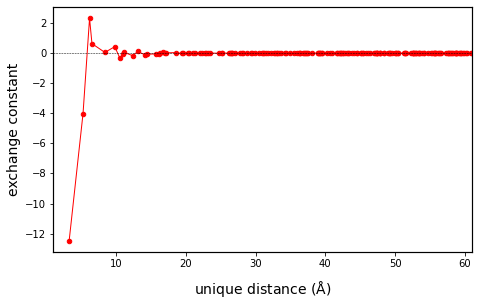

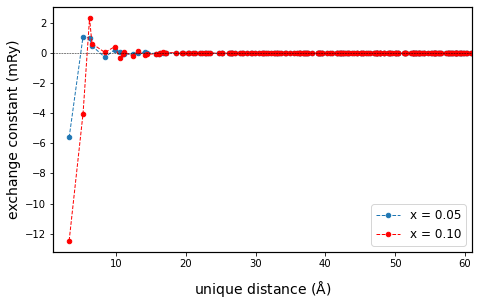

In [13]:
# PLOT OF J VS R FOR 10% CONFIG. ONLY

print('\n')
plt.figure(figsize = (7.5, 4.5))
plt.plot(d_lst_10percent, j_lst_10percent, lw = 1, color = 'red', marker = 'o', markersize = 4.5)
plt.xlabel(r'unique distance ($\AA$)', fontsize = 14, labelpad = 10)
plt.ylabel(r'exchange constant', fontsize = 14)
#plt.xticks(np.arange(int(min(d_arr_unique2)), int(max(d_arr_unique2))+6, 3))
plt.xlim(1, 61)
plt.axhline(y=0, color='black', linestyle='--',linewidth = 0.5)
plt.show()

# PLOTS OF UNIQUE VALUES FOR BOTH 5% AND 10% CONFIG.

d_lst_5percent = d_arr_unique.tolist()
j_lst_5percent = j_unique

plt.figure(figsize = (7.5, 4.5))
plt.plot(d_lst_5percent, j_lst_5percent, 'o--', lw = 1, label = 'x = 0.05', marker = 'o', markersize = 4.5)
plt.plot(d_lst_10percent, j_lst_10percent, 'o--', color = 'red', lw = 1, label = 'x = 0.10', marker = 'o', markersize = 4.5)
plt.xlabel(r'unique distance ($\AA$)', fontsize = 14, labelpad = 10)
plt.ylabel('exchange constant (mRy)', fontsize = 14)
#plt.xticks(np.arange(int(min(min(d_arr_unique), min(d_arr_unique2))), int(max(max(d_arr_unique), max(d_arr_unique2)))+6, 3))
plt.xlim(1, 61)
plt.axhline(y=0, color='black', linestyle='--',linewidth = 0.5)
plt.legend(fontsize = 12)
plt.show()

# J vs r (20% Mn)

In [14]:
array2 = array.copy()
array2.astype(int)

dope_over_2 = 10
total_dope_2 = Mn_percent + dope_over + dope_over_2

Mn_arrx2 = Mn_array.copy()
no_of_Mn_over2 = int(((len(Zn_row)*N)*dope_over_2)/100) 
tot2 = int(tot + no_of_Mn_over2)
Mn_array2 = np.zeros((no_of_Mn_over2, 2))

count = 0 
while count < no_of_Mn_over2:
    i = np.random.randint(len(array2))
    j = np.random.randint(len(array2))
    if array2[i][j] == 0:
        array2[i][j] = 2
        Mn_array2[count][0] = i
        Mn_array2[count][1] = j        
    else:
        continue
    count += 1

print(array2.astype(int))
print("")
Mn_arrx2.astype(int)
Mn_array2.astype(int)
new_Mn_arr2 = np.concatenate((new_Mn_arr, Mn_array2))
np.random.shuffle(new_Mn_arr2)
print(new_Mn_arr2.astype(int))

[[1 1 1 ... 1 1 1]
 [0 2 0 ... 2 0 0]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 2 0 0]
 [1 1 1 ... 1 1 1]
 [0 2 0 ... 0 0 0]]

[[67 64]
 [79  4]
 [45 77]
 ...
 [45 79]
 [81 38]
 [53  0]]


In [15]:
rand_index = np.random.choice(new_Mn_arr2.shape[0], size = 1)

x, y, K = int(rand_Mn[0][0]), int(rand_Mn[0][1]), 10
print([x, y])
NN_list = sorted(new_Mn_arr2, key = lambda K: c*(K[0]-x)**2 + a*(K[1]-y)**2)[1 : K+1]
NN0 = np.array(NN_list)
NN = NN0.astype(int)
print('\n', NN)

r = np.zeros((10, 1))
for i in range(NN.shape[0]):
    r[i] = sqrt((c*(x - NN[i][0]))**2 + (a*(y - NN[i][1]))**2)

r3 = np.sort(r, axis = 0)
print('\n', r3) 

[49, 81]

 [[47 81]
 [47 83]
 [45 81]
 [49 85]
 [53 79]
 [45 79]
 [45 84]
 [45 78]
 [45 77]
 [55 81]]

 [[ 5.26      ]
 [ 8.39280644]
 [10.52      ]
 [12.38717078]
 [12.38717078]
 [13.08      ]
 [14.38424485]
 [14.38424485]
 [15.78      ]
 [16.78561289]]



 2K = 5.0132565492620005


<ipython-input-16-e78543bba102>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


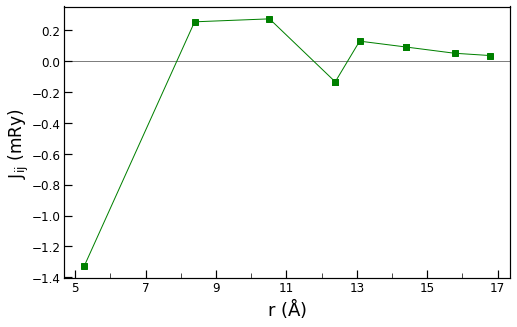

In [16]:
nc3 = 1                   
K3 = (2*np.pi*nc3)**(1/2)         
l3 = r3[2][0]
print('\n',"2K =", 2*K3)

def calc_x3(K3, r3):              
    return [2*K3*i for i in r3]
x3 = calc_x3(K3, r3)
              
def coupling_constant_20percent(r3, l3, K3, x3):
    return ((0.016)*(np.exp(-r3/l3)*(np.sin(x3)-x3*np.cos(x3))/(r3**4)))*13600
coupling_constant3 = np.vectorize(coupling_constant_20percent)

J3 = coupling_constant3(r3, l3, K3, x3)

plt.figure(figsize = (8, 5))
#plt.figtext(0.55, 0.75, "L = 50", fontsize = 16)

plt.xticks(np.arange(int(min(r3)), int(max(r3))+4, 2), fontsize = 12)
plt.yticks(fontsize = 12)
#plt.ylim(-0.072, 0.25)
ax = plt.axes()
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis ="both", which ="major", direction ='in', length = 8, width = 1.2)
ax.tick_params(axis = "both", which ="minor", direction ='in', length = 5, width = 0.7)
mpl.rcParams['mathtext.default'] = 'regular'
plt.xlabel(r'$r\ (\AA)$', fontsize = 18, labelpad = 1)
plt.ylabel(r'$J_{ij}\ (mRy)$', fontsize = 17, labelpad = 0.1)
plt.axhline(y=0, color='black', linestyle='-',linewidth = 0.5)
plt.plot(r3, J3, '-', lw = 1, color = "green", label = 'x = 0.20', marker = 's', markersize = 5.5)
plt.show()

<ipython-input-30-465b5aabac53>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


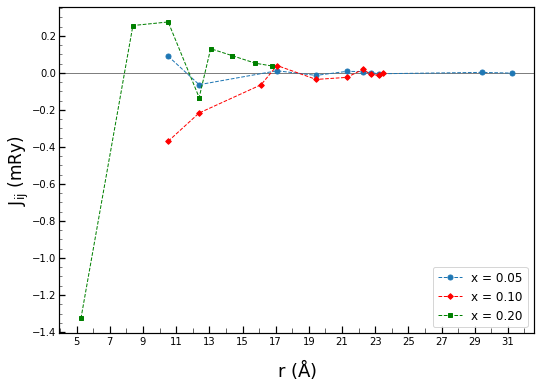

In [30]:
# SINGLE RANDOM SPIN INTERACTIONS COMPARED !

plt.figure(figsize = (8.5, 6))
#plt.figtext(0.55, 0.75, "L = 50", fontsize = 14)
#mpl.rcParams['axes.linewidth'] = 1.5
plt.xticks(np.arange(3, int(max(max(r1), max(r2), max(r3)))+6, 2), fontsize = 10)
#plt.xticks([3,5,7,9,11,13,15,17,19,21,23,25,27], fontsize = 12)
plt.yticks(fontsize = 10)
#plt.ylim(-0.015, 0.015)
ax = plt.axes()
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis ="x", which ="major", direction ='in', length = 7, width = 1.2)
ax.tick_params(axis ="y", which ="major", direction ='in', length = 6, width = 1.3)
ax.tick_params(axis = "x", which ="minor", direction ='in', length = 5, width = 0.6)
ax.tick_params(axis = "y", which ="minor", direction ='in', length = 3, width = 0.5)
mpl.rcParams['mathtext.default'] = 'regular'
plt.xlabel(r'$r\ (\AA)$', fontsize = 18, labelpad = 10)
plt.ylabel(r'$J_{ij}\ (mRy)$', fontsize = 17, labelpad = 0.1)
plt.axhline(y=0, color='black', linestyle='-',linewidth = 0.5)
plt.plot(r1, J1, 'o--', lw = 1, label ='x = 0.05', marker = 'o', markersize = 5)
plt.plot(r2, J2, 'o--', lw = 1, color = "red", label = 'x = 0.10', marker = 'D', markersize = 4)
plt.plot(r3, J3, 'o--', lw = 1, color = "green", label = 'x = 0.20', marker = 's', markersize = 4)
plt.legend(fontsize = 12)
plt.show()

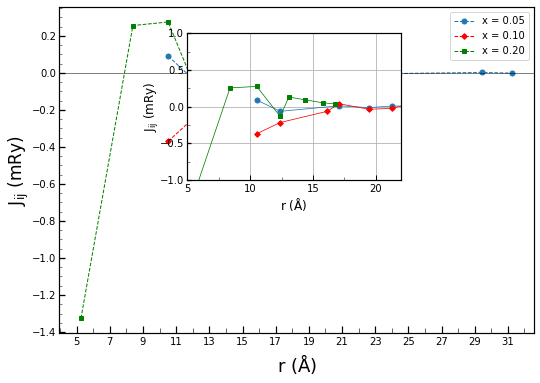

In [29]:
fig, ax = plt.subplots(figsize = (8.5, 6))
#mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['mathtext.default'] = 'regular'

ax.set_xticks(np.arange(3, int(max(max(r1), max(r2), max(r3)))+6, 2))
ax.plot(r1, J1, 'o--', lw = 1, label ='x = 0.05', marker = 'o', markersize = 5)
ax.plot(r2, J2, 'o--', lw = 1, color = "red", label = 'x = 0.10', marker = 'D', markersize = 4)
ax.plot(r3, J3, 'o--', lw = 1, color = "green", label = 'x = 0.20', marker = 's', markersize = 4)
#ax.set_ylim(-2, 16)
ax.set_xlabel(r'$r\ (\AA)$', fontsize = 18, labelpad = 5)
ax.set_ylabel(r'$J_{ij}\ (mRy)$', fontsize = 17, labelpad = 0.1)
ax.axhline(y=0, color='black', linestyle='-',linewidth = 0.5)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis ="x", which ="major", direction ='in', length = 7, width = 1.2)
ax.tick_params(axis ="y", which ="major", direction ='in', length = 6, width = 1.3)
ax.tick_params(axis = "x", which ="minor", direction ='in', length = 5, width = 0.6)
ax.tick_params(axis = "y", which ="minor", direction ='in', length = 3, width = 0.5)
ax.legend(fontsize = 10)

axIns = ax.inset_axes([0.27, 0.47, 0.45, 0.45])
axIns.plot(r1, J1, lw = 0.75, label ='x = 0.05', marker = 'o', markersize = 5)
axIns.plot(r2, J2, lw = 0.75, color = "red", label = 'x = 0.10', marker = 'D', markersize = 4)
axIns.plot(r3, J3, lw = 0.75, color = "green", label = 'x = 0.20', marker = 's', markersize = 4)
axIns.set_xlim(5, 22)
axIns.set_ylim(-1, 1)
axIns.set_xticks(np.arange(5, 25, 5))
axIns.set_yticks([-1, -0.5, 0, 0.5, 1])
axIns.set_xlabel(r'$r\ (\AA)$', fontsize = 12, labelpad = 2)
axIns.set_ylabel(r'$J_{ij}\ (mRy)$', fontsize = 12, labelpad = -1)
#axIns.axhline(y=0, color='black', linestyle='-',linewidth = 0.5)
axIns.xaxis.set_minor_locator(MultipleLocator(2.5))
axIns.yaxis.set_minor_locator(ticker.FixedLocator([-0.75, -0.25, 0.25, 0.75]))
axIns.tick_params(axis ="x", which ="major", direction ='in', length = 5, width = 1)
axIns.tick_params(axis ="y", which ="major", direction ='in', length = 4, width = 1.3)
axIns.tick_params(axis = "x", which ="minor", direction ='in', length = 3, width = 0.5)
axIns.tick_params(axis = "y", which ="minor", direction ='in', length = 3, width = 0.5)
axIns.grid()
print('\n')
plt.show()

In [19]:
nb_list3 = []

for i in new_Mn_arr2.astype(int):
    x03, y03, k3 = i[0], i[1], 999
    nb_list3.append(sorted(new_Mn_arr2.astype(int), key = lambda k3: c*(k3[0]-x03)**2 + a*(k3[1]-y03)**2)[1 : k3+1]) 
    
nb03 = np.array(nb_list3) 
nb3 = nb03.reshape((999000, 2))  # ALL NNs CORRESPONDING TO EACH Mn

In [20]:
d_list3 = []

for i in range(len(new_Mn_arr2)):
    for j in range(999*i, 999*i+999):        
        d_list3.append(sqrt((c*(new_Mn_arr2[i][0] - nb3[j][0]))**2 + (a*(new_Mn_arr2[i][1] - nb3[j][1]))**2))  # ALL DISTANCES

d_arr03 = np.array(d_list3)
d_arr3 = d_arr03.reshape((999000, 1))          # ALL DISTANCES OF ALL NNs
print('\n', "Ten nearest neighbour distances of each Mn (row-wise):")
print('\n', d_arr3.reshape((1000, 999)))

d_arr_unique3 = np.unique(d_arr3, axis = 0)   # ONLY UNIQUE VALUES OF DISTANCES
print('\n'*2,"Unique distances =", len(d_arr_unique3))
print('\n', d_arr_unique3)

"""n_step = 999
d_avg_arr3 = np.average(d_arr3.reshape(-1, n_step), axis = 1)    # AVERAGE DISTANCES OF EACH SPIN'S NN
#print('\n',"Average distances in sets of ten:",'\n',d_avg_arr3.reshape((99900, 1)))  

for i in range(len(new_Mn_arr2)):
    d_arr13 = d_arr3[999*i : 999*i+998].sort()   # WONT WORK !!!
print('\n',d_arr13)"""


j_list3, l_list3 = [], []

for i in range(len(new_Mn_arr2)):
    l_list3.append(d_arr3[999*i+2])
l_arr3 = np.array(l_list3)
l_avg3 = np.sum(l_arr3)/len(new_Mn_arr2)      # AVERAGE DAMPING SCALE VALUE 
print('\n'*2, "Average damping scale value = ", l_avg3)

for i in range(d_arr3.shape[0]):
    j_list3.append((0.0160*(np.exp(-d_arr3[i][0]/l_avg3)*(np.sin(5.013*d_arr3[i][0])-5.013*d_arr3[i][0]*np.cos(5.013*d_arr3[i][0]))/(d_arr3[i][0]**4)))*13600)
j_arr3 = np.array(j_list3)
j_arr3 = j_arr3.reshape((999000, 1))           # ALL EXCHANGE CONSTANTS OF NNs
print('\n'*2, "Exchange constants corresponding to ten nearest neighbours of each Mn:")
print('\n', j_arr3.reshape((1000, 999)))

j_arr_unique3 = np.unique(j_arr3, axis = 0)  
print('\n', "total unique data points =",len(j_arr_unique3), '\n')

j_unique3 = []     # ONLY UNIQUE EXCHANGE CONSTANTS CORRESPONDING TO UNIQUE Mn

for i in range(d_arr_unique3.shape[0]):
    j_unique3.append((0.0160*(np.exp(-d_arr_unique3[i][0]/l_avg3)*(np.sin(5.01*d_arr_unique3[i][0])-5.01*d_arr_unique3[i][0]*np.cos(5.01*d_arr_unique3[i][0]))/(d_arr_unique3[i][0]**4)))*13600)

"""n_step = 10
j_avg_arr3 = np.average(j_arr3.reshape(-1, n_step), axis = 1)   # AVERAGE EXCHANGE CONSTANTS FOR NNs CORRESPONDING TO EACH Mn
print('\n'*2,"Average exchange constants for nearest neighbours sets:")
print('\n', j_avg_arr3.reshape((100, 10)), '\n')

result3 = "\n".join("{}  {}".format(i, j) for i, j in zip(d_lst_20percent, j_lst_20percent))
print(result3)"""

d_lst_20percent = d_arr_unique3.tolist()
j_lst_20percent = j_unique3



 Ten nearest neighbour distances of each Mn (row-wise):

 [[  6.54         8.39280644  14.09801404 ... 260.99789903 262.73310355
  269.38844908]
 [  6.19358539   8.39280644   8.39280644 ... 355.62087959 361.1041851
  366.83144862]
 [  3.27         6.54         6.19358539 ... 281.66423575 284.06065215
  286.2374378 ]
 ...
 [  3.27         6.54         6.54       ... 287.52552321 289.87348775
  291.93369795]
 [ 11.13120389  12.38717078  14.09801404 ... 275.03725293 272.58854726
  285.4647875 ]
 [  3.27         5.26         6.19358539 ... 338.96315906 343.79097036
  345.4168405 ]]


 Unique distances = 4947

 [[  3.27      ]
 [  5.26      ]
 [  6.19358539]
 ...
 [402.1532351 ]
 [402.85470929]
 [406.17197589]]


 Average damping scale value =  9.053751455996684


 Exchange constants corresponding to ten nearest neighbours of each Mn:

 [[-3.22788721e-01  2.26014658e-01  1.36064653e-04 ... -1.66861112e-18
   1.09348897e-17 -6.04005541e-18]
 [-2.18864850e+00  2.26014658e-01  2.26014658e-01 

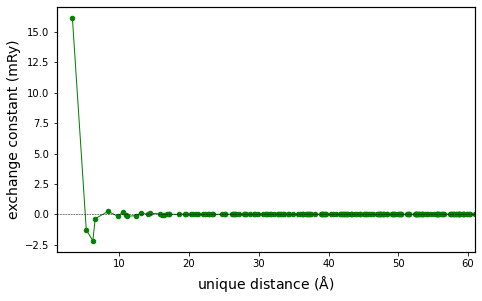

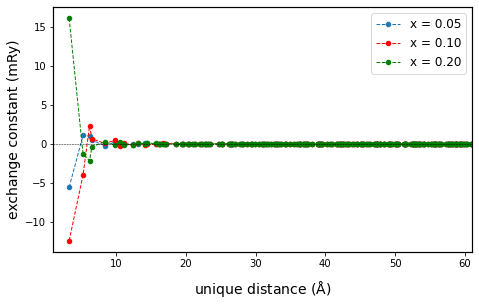

In [21]:
# PLOT OF J VS R FOR 20% CONFIG. ONLY

print('\n')
plt.figure(figsize = (7.5, 4.5))
plt.plot(d_lst_20percent, j_lst_20percent, lw = 1, color = 'green', marker = 'o', markersize = 4.5)
plt.xlabel(r'unique distance ($\AA$)', fontsize = 14, labelpad = 5)
plt.ylabel('exchange constant (mRy)', fontsize = 14)
#plt.xticks(np.arange(int(min(d_arr_unique3)), int(max(d_arr_unique3))+3, 3))
plt.xlim(1, 61)
plt.axhline(y=0, color='black', linestyle='--',linewidth = 0.5)
plt.show()

# PLOT OF UNIQUE VALUES FOR ALL THREE 5%, 10% AND 20% CONFIG.

plt.figure(figsize = (7.5, 4.5))
plt.plot(d_lst_5percent, j_lst_5percent, 'o--', lw = 1, label = 'x = 0.05', marker = 'o', markersize = 4.5)
plt.plot(d_lst_10percent, j_lst_10percent, 'o--', color = 'red', lw = 1, label = 'x = 0.10', marker = 'o', markersize = 4.5)
plt.plot(d_lst_20percent, j_lst_20percent, 'o--', color = 'green', lw = 1, label = 'x = 0.20', marker = 'o', markersize = 4.5)
plt.xlabel(r'unique distance ($\AA$)', fontsize = 14, labelpad = 10)
plt.ylabel('exchange constant (mRy)', fontsize = 14)
#min_xtick, max_xtick = int(min(min(d_arr_unique), min(d_arr_unique2), min(d_arr_unique3))), int(max(max(d_arr_unique), max(d_arr_unique2), max(d_arr_unique3)))+3
#plt.xticks(np.arange(min_xtick, max_xtick, 3))
plt.xlim(1, 61)
plt.axhline(y=0, color='black', linestyle='--',linewidth = 0.5)
plt.legend(fontsize = 12)
plt.show()




 [-0.09469152335801485, -1.0818434147646132, 2.2076078491181255]


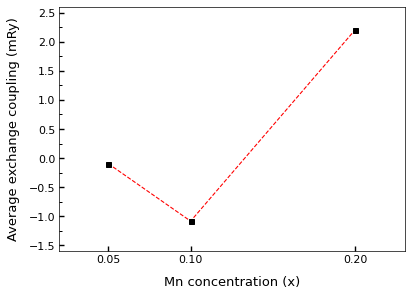

In [84]:
# Tc vs x plot from MFA

"""def curie0(kb, xsigma):
    return (35/(12*kb))*xsigma
curie = np.vectorize(curie0)

kb = 8.617 * 10**-5
x_list = [0.05, 0.10, 0.20]
sum_1, sum_2, sum_3 = np.sum(j_arr), np.sum(j_arr2), np.sum(j_arr3)
sigma_list = [sum_1/(13600*62250), sum_2/(13600*249500), sum_3/(13600*999000)]
sigma_list2 = []
xsigma = [i * j for i, j in zip(x_list, sigma_list)]

Tc = curie(kb, xsigma)

plt.plot(x_list, Tc, marker = 's')
plt.xlabel("Dopant concentration (x)", fontsize = 15, labelpad = 10)
plt.ylabel("Curie temperature (Tc)", fontsize = 15, labelpad = 7)
plt.xticks(np.arange(0, 0.25, 0.05), fontsize = 12)
plt.yticks(fontsize = 12)
plt.axis('tight')
plt.show()"""


# J(summed) vs Mn% plot

#y = [np.sum(j_avg_arr), np.sum(j_avg_arr2), np.sum(j_avg_arr3)]
mpl.rcParams['axes.linewidth'] = 0.7
y = [np.sum(j_arr)/(2*250), np.sum(j_arr2)/(2*500), np.sum(j_arr3)/(2*1000)]
x = [0.05, 0.10, 0.20]

print('\n')
fig, ax = plt.subplots(figsize = (6.2, 4.5))
ax.plot(x, y, '--', lw = 1.1, color = 'red', marker = 's', markeredgecolor = 'black', markerfacecolor = 'black', markersize = 5)
#ax.axhline(y=0, color='black', linestyle='-', linewidth = 0.7)
ax.yaxis.set_minor_locator(ticker.FixedLocator(np.arange(-1.25, 2.75, 0.5)))
ax.tick_params(axis ="both", which ="major", direction ='in', labelsize = 11, length = 5, width = 1.4)
#ax.tick_params(axis ="y", which ="major", direction ='in', length = 6, width = 1.3)
ax.tick_params(axis = "y", which ="minor", direction ='in', length = 2.6, width = 1)

ax.set_xticks([0.05, 0.10, 0.20])
ax.set_xlabel('Mn concentration (x)', fontsize = 13, labelpad = 11)
ax.set_ylabel('Average exchange coupling (mRy)', fontsize = 13, labelpad = 8.5)
ax.set_xlim(0.02, 0.23)
ax.set_ylim(-1.6, 2.6)
print('\n', y)
plt.show()
#plt.savefig('plot-avgJ2.jpg', dpi = 1200)

# J vs nc plot

r1= 10.52
r2= 12.387170782709019


<ipython-input-23-f7c68259eb96>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axs = plt.axes()


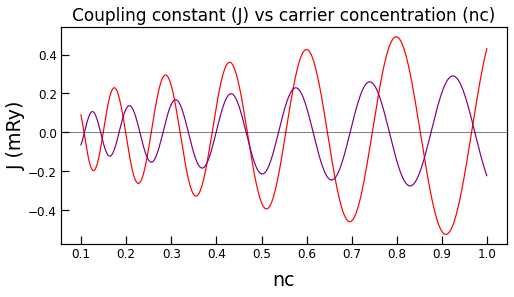

In [23]:
# J vs nc plot:

d1 = r1[0][0]    # D1 = r1, the first nearest neighbour
d2 = r1[1][0]    # D2 = r2, the second nearest neighbour

print("r1=", d1)
print("r2=", d2)

l = r1[2][0]     # D3, the third nearest neighbour (cutoff parameter)
nc = np.arange(0.1, 1.0, 0.0009)  # carrier density range

def calc_K(nc):
    return [(2 * np.pi * val)**(1/2) for val in nc]
K = calc_K(nc)

x1 = [2 * i * d1 for i in K]
x2 = [2 * i * d2 for i in K]

j0 = 0.0174
             
def couplingA(l, x1, nc):
    return (j0*(np.exp(-d1/l))*(np.sin(x1)-x1*np.cos(x1))/(d1**4))*13600   # J in mRy
coupling1 = np.vectorize(couplingA)

def couplingB(l, x2, nc):
    return (j0*(np.exp(-d2/l))*(np.sin(x2)-x2*np.cos(x2))/(d2**4))*13600
coupling2 = np.vectorize(couplingB)

Jnc1 = coupling1(l, x1, nc)
Jnc2 = coupling2(l, x2, nc)

plt.figure(figsize = (8, 4))
plt.xticks(np.arange(0, max(nc)+1, 0.1), fontsize = 12)
plt.yticks(fontsize = 12)
axs = plt.axes()
axs.xaxis.set_minor_locator(MultipleLocator(0.1))
axs.tick_params(axis ="both", which ="major", direction ='in', length = 8, width = 1.2)
axs.tick_params(axis = "both", which ="minor", direction ='in', length = 5, width = 0.7)
mpl.rcParams['mathtext.default'] = 'regular'

plt.xlabel("nc", fontsize = 19, labelpad = 10)
plt.ylabel("J (mRy)", fontsize = 19, labelpad = 2)
plt.title("Coupling constant (J) vs carrier concentration (nc)", size=17)
plt.plot(nc, Jnc1, lw = 1.2, color = "red")
plt.plot(nc, Jnc2, lw = 1.2, color = "purple")
plt.axhline(y=0, color='black', linestyle='-',linewidth = 0.5)
plt.show()

r1= 10.52
r2= 12.387170782709019


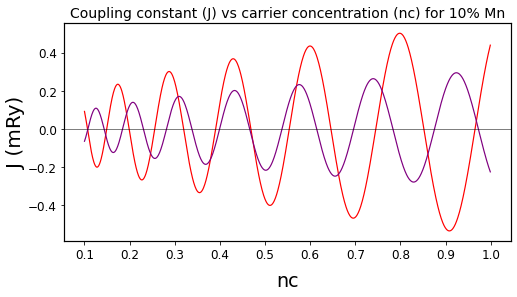

In [24]:
d1 = r2[0][0]     # D1 = r1, the first nearest neighbour
d2 = r2[1][0]     # D2 = r2, the second nearest neighbour

print("r1=", d1)
print("r2=", d2)

l = r2[2][0]      # D3, the third nearest neighbour (cutoff parameter)  
nc = np.arange(0.1, 1.0, 0.0009)  # carrier density range

def calc_K(nc):
    return [(2 * np.pi * val)**(1/2) for val in nc]
K = calc_K(nc)

x1 = [2 * i * d1 for i in K]
x2 = [2 * i * d2 for i in K]

j0 = 0.0184
     
def couplingC(l, x1, nc):
    return (j0*(np.exp(-d1/l)*(np.sin(x1)-x1*np.cos(x1))/(d1**4)))*13600   # J in mRy
coupling4 = np.vectorize(couplingC)

def couplingD(l, x2, nc):
    return (j0*(np.exp(-d2/l)*(np.sin(x2)-x2*np.cos(x2))/(d2**4)))*13600
coupling5 = np.vectorize(couplingD)

Jnc3 = coupling4(l, x1, nc)
Jnc4 = coupling5(l, x2, nc)

plt.figure(figsize = (8, 4))
plt.xlabel("nc", fontsize = 19, labelpad = 10)
plt.ylabel("J (mRy)", fontsize = 20, labelpad = 2)
plt.xticks(np.arange(0, max(nc)+2, 0.1), fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Coupling constant (J) vs carrier concentration (nc) for 10% Mn", size=14)
plt.plot(nc, Jnc3, lw = 1.2, color = "red")
plt.plot(nc, Jnc4, lw = 1.2, color = "purple")
plt.axhline(y=0, color='black', linestyle='-',linewidth = 0.5)
plt.show()

r1= 5.26
r2= 8.392806443615866


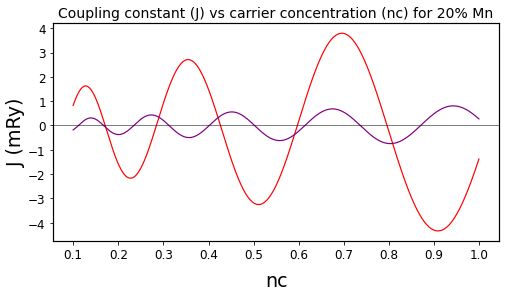

In [25]:
d1 = r3[0][0]     # D1 = r1, the first nearest neighbour
d2 = r3[1][0]     # D2 = r2, the second nearest neighbour

print("r1=", d1)
print("r2=", d2)

l = r3[2][0]      # D3, the third nearest neighbour (cutoff parameter)
nc = np.arange(0.1, 1.0, 0.0009)  # carrier density range

def calc_K(nc):
    return [(2 * np.pi * val)**(1/2) for val in nc]
K = calc_K(nc)

x1 = [2 * i * d1 for i in K]
x2 = [2 * i * d2 for i in K]

j0 = 0.016
                              
def couplingE(l, x1, nc):
    return (j0*(np.exp(-d1/l)*(np.sin(x1)-x1*np.cos(x1))/(d1**4)))*13600   # J in mRy
coupling7 = np.vectorize(couplingE)

def couplingF(l, x2, nc):
    return (j0*(np.exp(-d2/l)*(np.sin(x2)-x2*np.cos(x2))/(d2**4)))*13600
coupling8 = np.vectorize(couplingF)

Jnc5 = coupling7(l, x1, nc)
Jnc6 = coupling8(l, x2, nc)

plt.figure(figsize = (8, 4))
plt.xlabel("nc", fontsize = 19, labelpad = 10)
plt.ylabel("J (mRy)", fontsize = 19, labelpad = 2)
plt.xticks(np.arange(0, max(nc)+2, 0.1), fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Coupling constant (J) vs carrier concentration (nc) for 20% Mn", size=14)
plt.plot(nc, Jnc5, lw = 1.2, color = "red")
plt.plot(nc, Jnc6, lw = 1.2, color = "purple")
plt.axhline(y=0, color='black', linestyle='-',linewidth = 0.5)
plt.show()

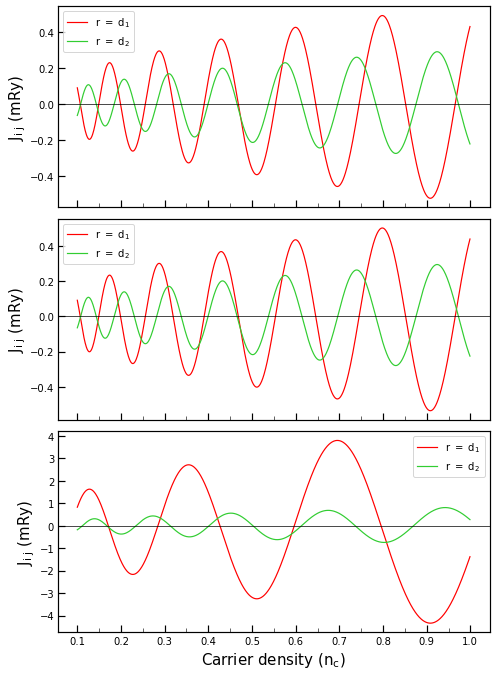

In [26]:
# SUBPLOTS

print('\n')
fig, ax = plt.subplots(3, 1, sharex = True, figsize = (7, 9.5))
mpl.rcParams['mathtext.default'] = 'regular'

ax[0].plot(nc, Jnc1, lw = 1.2, color = "red", label = r'$r\ =\ d_1$')
ax[0].plot(nc, Jnc2, lw = 1.2, color = "limegreen", label = r'$r\ =\ d_2$')
#ax[0].text(0.7, 0.09, "x = 0.05", fontweight = "bold", fontsize = 10)
ax[0].set_ylabel(r'$J_{i\ j}\ (mRy)$', fontsize = 15, labelpad = 2)
ax[0].set_xticks(np.arange(0.1, 1.1, 0.1))
#ax[0].set_yticks(np.arange(-0.100, 0.125, 0.025))
ax[0].xaxis.set_minor_locator(ticker.FixedLocator([0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]))
ax[0].tick_params(axis ="both", which ="major", direction ='in', length = 7, width = 1.2)
ax[0].tick_params(axis = "both", which ="minor", direction ='in', length = 4, width = 0.6)
#ax[0].set_ylim(-0.05, 0.05)
ax[0].axhline(y=0, color='black', linestyle='-', linewidth = 0.7)
ax[0].legend()

ax[1].plot(nc, Jnc3, lw = 1.2, color = "red", label = r'$r\ =\ d_1$')
ax[1].plot(nc, Jnc4, lw = 1.2, color = "limegreen", label = r'$r\ =\ d_2$')
#ax[1].text(0.7, 0.09, "x = 0.10", fontweight = "bold", fontsize = 10)
ax[1].set_ylabel(r'$J_{i\ j}\ (mRy)$', fontsize = 15, labelpad = 2)
ax[1].set_xticks(np.arange(0.1, 1.1, 0.1))
#ax[1].set_yticks(np.arange(-0.100, 0.125, 0.025))
ax[1].tick_params(axis ="both", which ="major", direction ='in', length = 7, width = 1.2)
ax[1].tick_params(axis = "both", which ="minor", direction ='in', length = 4, width = 0.6)
#ax[1].set_ylim(-0.05, 0.05)
ax[1].axhline(y=0, color='black', linestyle='-', linewidth = 0.7)
ax[1].legend()

ax[2].plot(nc, Jnc5, lw = 1.2, color = "red", label = r'$r\ =\ d_1$')
ax[2].plot(nc, Jnc6, lw = 1.2, color = "limegreen", label = r'$r\ =\ d_2$')
#ax[2].text(0.7, 0.09, "x = 0.20", fontweight = "bold", fontsize = 10)
ax[2].set_xlabel(r'$Carrier\ density\ (n_{c})$', fontsize = 15, labelpad = 4)
ax[2].set_ylabel(r'$J_{i\ j}\ (mRy)$', fontsize = 15, labelpad = 2)
ax[2].set_xticks(np.arange(0.1, 1.1, 0.1))
#ax[2].set_yticks(np.arange(-0.100, 0.125, 0.025))
ax[2].tick_params(axis ="both", which ="major", direction ='in', length = 7, width = 1.2)
ax[2].tick_params(axis = "both", which ="minor", direction ='in', length = 4, width = 0.6)
#ax[2].set_ylim(-0.05, 0.05)
ax[2].axhline(y=0, color='black', linestyle='-', linewidth = 0.7)
ax[2].legend()

fig.tight_layout()
plt.show()